<a href="https://colab.research.google.com/github/DavShaw/Fisica-II/blob/master/charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import random
import sympy as sp
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [80]:
# Class Coulomb convertor
class CoulombConverter:
    def __init__(self):
        self.k = 8.9875517923e9

    def getConstant(self):
        return self.k

    def coulombToNewton(self, coulombs):
        force = self.k * coulombs / (1**2)
        return force

    def newtonToCoulomb(self, newtons):
        coulombs = newtons * (1**2) / self.k
        return coulombs

    def microToCoulomb(self, micro):
        return micro / 1e6

    def coulombToMicro(self, coulomb):
        return coulomb * 1e6

In [81]:
# Class vector
class Vector:
  def __init__(self, start: tuple, end: tuple):
    self.start = start
    self.end = end
    self.vector = np.array([self.end[0], self.end[1]]) - np.array([self.start[0], self.start[1]])

  def getVector(self):
    return self.vector

  def getTupleVector(self):
    return tuple(self.vector)

  def getMagnitude(self):
    return np.linalg.norm(self.vector)

  def getDirection(self):
    if self.vector[0] == 0:
      return 0
    return np.arctan(self.vector[1]/self.vector[0])

  def getXVector(self):
    direction = self.getDirection()
    magnitude = self.getMagnitude()
    start = self.start
    end = (magnitude*np.cos(direction),0)
    return Vector(start, end)

  def getYVector(self):
    direction = self.getDirection()
    magnitude = self.getMagnitude()
    start = self.start
    end = (0,magnitude*np.sin(direction))
    return Vector(start, end)

  def copy(self):
    return np.array([self.vector[0], self.vector[1]])

  def getUr(self):
    return self.copy()/self.getMagnitude()

  def __repr__(self) -> str:
    return str(self.getTupleVector())

In [82]:
# Class Charge
class Charge:
  def __init__(self, value, x, y):
    self.value = value
    self.x = x
    self.y = y

  def _getSign(self, value):
    if value < 0:
      return -1
    return 1

  def getX(self):
    return self.x

  def getY(self):
    return self.y

  def getPoint(self):
    return (self.x,self.y)

  def getDistance(self, c2):
    return np.sqrt((self.x - c2.x)** 2 + (self.y - c2.y) ** 2)

  def getCoulombLaw(self, c2):
    k = 9*(10**9)
    r = Vector(self.getPoint(), c2.getPoint())
    magnitude = r.getMagnitude()
    direction = r.getDirection()
    ur = r.getUr()
    xSign = self._getSign(magnitude * np.cos(direction))
    ySign = self._getSign(magnitude * np.sin(direction))
    forceVector = k * abs(self.value * c2.value) * ur
    forceVector /= (magnitude)**2
    forceVector[0] *= xSign
    forceVector[1] *= ySign
    return forceVector

  def __repr__(self) -> str:
    return str(f"{self.getPoint()} - [{self.value}]")

In [83]:
# Depends functions
def generateCharges(n, randomValue = True, valueInterval=(0.1, 5), xInterval=(-80, 80), yInterval=(-50, 50)):
    charges = []
    converter = CoulombConverter()

    min_value, max_value = valueInterval
    min_x, max_x = xInterval
    min_y, max_y = yInterval

    for _ in range(n):
        value = random.uniform(min_value, max_value)
        value = converter.microToCoulomb(value)
        x = round(random.uniform(min_x, max_x),2)
        y = round(random.uniform(min_y, max_y),2)
        charge = Charge(value, x, y)
        charges.append(charge)
    return charges

def getVelocityFunction(a):
  t = sp.symbols('t')
  function = a * t
  return function

def getAceleration(mass, fy: list):
  a = sp.symbols('a')
  f = mass * a
  sumf = sum(fy)
  # sumf = f so...
  equation = sp.Eq(f,sumf)
  return sp.solve(equation,a)[0]

def generateChargesCoordenates(start, end, delta, y = 0):
  i = 0
  coords = []
  while True:
    if i >= end:
      break
    coords.append((i,y))
    i += delta
  return coords

def generateChargeValue(n):
  convert = CoulombConverter()
  values = []
  for v in range(n):
    value = random.randint(0,10)
    if value == 0:
      value += 0.1
    value = convert.microToCoulomb(value)
    values.append(value)
  return values

def getForcesVectors(charges, q0):
  forcesVectors = []
  for c in charges:
    x1 = c.getX()
    y1 = c.getY()
    x2 = c.getCoulombLaw(q0)[0]
    y2 = c.getCoulombLaw(q0)[1]
    vector = Vector((x1,y1), (x2,y2))
    forcesVectors.append(vector)
  return forcesVectors

# I got some help from Claude3
def functionOf(textFunction, variable, evaluatefor):
    var = sp.symbols(variable)
    func = sp.sympify(textFunction)
    result = func.subs(var, evaluatefor)
    return result


Pos (x,y) = (3, 5.50000000000000)
Pos (x,y) = (3, 5.50000000000000)


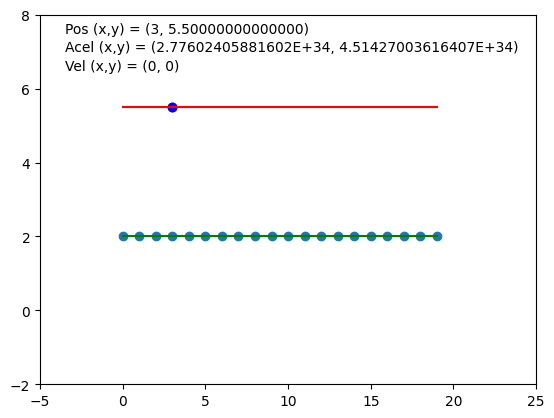

In [84]:
# The simulation

# Limits for plot
xLimits, yLimits = (-5,25), (-2,8)

# Limits for charges (positives)
intervalForCharges = (0,20)
start, stop = intervalForCharges

# Generate the negatives line
negativesLineY = [functionOf("5.5","x",i) for i in range(start, stop)]
negativesLineX = [i for i in range(start, stop)]

# Generate the positives line
positivesLineY = [functionOf("2","x",i) for i in range(start, stop)]
positivesLineX = [i for i in range(start, stop)]

# Generate charges coords - values - mass and more stuff
chargesCoords = generateChargesCoordenates(start, stop, 1, 2)
chargesValues = generateChargeValue(len(chargesCoords))
charges = [Charge(chargesValues[i], chargesCoords[i][0], chargesCoords[i][1]) for i in range(len(chargesCoords))]

puntualChargeCoords = (3,5.5)
# Mass got from internet
puntualChargeMass = 9.109e-31
puntualCharge = Charge(-2, puntualChargeCoords[0], puntualChargeCoords[1])

chargesCoordsX = [x[0] for x in chargesCoords]
chargesCoordsY = [y[1] for y in chargesCoords]


# Let's move the charge!
xLimits, yLimits = (-5, 25), (-2, 8)

fig, ax = plt.subplots()
ax.set_xlim(xLimits)
ax.set_ylim(yLimits)

ax.plot(negativesLineX, negativesLineY, 'r')
ax.plot(positivesLineX, positivesLineY, 'g')
ax.scatter(chargesCoordsX, chargesCoordsY)
posText = ax.text(0.05, 0.95, '', transform=ax.transAxes, ha='left', fontsize=10)
acelerationText = ax.text(0.05, 0.90, '', transform=ax.transAxes, ha='left', fontsize=10)
velocityText = ax.text(0.05, 0.85, '', transform=ax.transAxes, ha='left', fontsize=10)


xPosition = puntualChargeCoords[0]
yPosition = puntualChargeCoords[1]

scientificNotation = lambda n: f"{n:.3e}"

interval = 200
lastxVelocity = 0
lastyVelocity = 0

def animate(frame):
  global xPosition
  global yPosition
  global interval
  global lastxVelocity
  global lastyVelocity
  time = (frame*interval)/1000

  # Get vectors
  forcesVectors = getForcesVectors(charges, puntualCharge)
  forcesyVectors = [v.getYVector() for v in forcesVectors]
  forcesxVectors = [v.getXVector() for v in forcesVectors]
  forcesxSum = [v.getMagnitude() for v in forcesxVectors]
  forcesySum = [v.getMagnitude() for v in forcesyVectors]

  # Get aceleraction (Using 2nd newton's law [F = MA])
  xAceleration = getAceleration(puntualChargeMass, forcesxSum)
  yAceleration = getAceleration(puntualChargeMass, forcesySum)

  # Equations
  velocity = lambda a, v0, t: v0 + a*t
  position = lambda p0, v0, a, t: p0 + v0*t + (1/2)*time*time*a

  # Get velocity (Using MRUA eq) (x) (y)
  vx = velocity(xAceleration, lastxVelocity, time)
  vy = velocity(yAceleration, lastyVelocity, time)

  # Get position (Using MRUA eq) (x) (y)
  xPosition = position(xPosition, vx, xAceleration, time)
  yPosition = position(yPosition, vy, yAceleration, time)

  point = ax.scatter(xPosition, yPosition, color='blue')
  posText.set_text(f"Pos (x,y) = ({(xPosition)}, {(yPosition)})")
  velocityText.set_text(f"Vel (x,y) = ({(vx)}, {(vy)})")
  acelerationText.set_text(f"Acel (x,y) = ({(xAceleration)}, {(yAceleration)})")
  print((f"Pos (x,y) = ({(xPosition)}, {(yPosition)})"))
  return point, posText, velocityText, acelerationText


# ChatGPT helps us here
ani = animation.FuncAnimation(fig, animate, frames=100, interval=interval, blit=True)

plt.show()